In [4]:
from datetime import datetime
import time
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import pandas as pd
import  os as os
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
sg = Subgrounds()
snapshot = sg.load_api('https://hub.snapshot.org/graphql')

In [6]:
snapshot.Proposal.datetime = SyntheticField(
  lambda timestamp: str(datetime.fromtimestamp(timestamp)),
  SyntheticField.STRING,
  snapshot.Proposal.end,
)

In [7]:
spacename = input('Enter space name')

In [8]:
daysLimit = int(input('How many days in the past do you want to go?'))

In [9]:
proposals = snapshot.Query.proposals(
  orderBy='created',
  orderDirection='desc',
  first=1000,
  where=[
    snapshot.Proposal.space == spacename, ##'fuse.eth',
    snapshot.Proposal.state == 'closed'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)


In [10]:
proposals_snapshots = sg.query_df([
    proposals.title,
    proposals.created,
    proposals.id,
    proposals.start,
    proposals.end,
    proposals.votes
])

proposals_snapshots['createdDate']=(pd.to_datetime(proposals_snapshots['proposals_created'],unit='s'))
proposals_snapshots['startDate']=(pd.to_datetime(proposals_snapshots['proposals_start'],unit='s'))
proposals_snapshots['endDate']=(pd.to_datetime(proposals_snapshots['proposals_end'],unit='s'))
proposals_snapshots.head(10)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate
0,Proposal to Bootstrap liquidity for Stargate U...,1679754607,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,1679754602,1680013802,81613,2023-03-25 14:30:07,2023-03-25 14:30:02,2023-03-28 14:30:02
1,Proposal to Approve Stargate Deployment to BAS...,1679685408,0xb850477539d006f12feb53c1ef7d1ebc967cb5424a39...,1679685378,1679944578,92634,2023-03-24 19:16:48,2023-03-24 19:16:18,2023-03-27 19:16:18
2,Proposal To Unwind The Reissue Of STG,1678498074,0xd0e742caae098261a030feaed2f10d1a36646bdf0ac8...,1678498043,1678757243,71506,2023-03-11 01:27:54,2023-03-11 01:27:23,2023-03-14 01:27:23
3,Liquidity Reallocation from POL-LP to POL-Pools,1678478770,0x9301f156dd6aa17b2165fb3834e9523413884bc8158a...,1678478758,1678737958,69951,2023-03-10 20:06:10,2023-03-10 20:05:58,2023-03-13 20:05:58
4,Beefy x Stargate: Integration Proposal,1678478609,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,1678478570,1678737770,69790,2023-03-10 20:03:29,2023-03-10 20:02:50,2023-03-13 20:02:50
5,Additional PancakeSwap Farm Proposal,1677275011,0xe9ee47fa9148b1ef9820dcb6504b423f99d0bc4243e9...,1677274996,1677534196,78337,2023-02-24 21:43:31,2023-02-24 21:43:16,2023-02-27 21:43:16
6,Stargate Market Maker - Preserving CEX Listings,1676443867,0x82586192cf58f438cfee7101afde68df11ab3be071a6...,1676443854,1676703054,81997,2023-02-15 06:51:07,2023-02-15 06:50:54,2023-02-18 06:50:54
7,STG Reissue,1675407295,0x26a68e276ab63195580c5100423c5db7177c9a0f15c7...,1675407280,1675666480,70806,2023-02-03 06:54:55,2023-02-03 06:54:40,2023-02-06 06:54:40
8,Autonomous Pool Deployment - WOO,1674842548,0x1568deb7f61440b48a56e1c44e3d023852002e693fb3...,1674842539,1675101739,67196,2023-01-27 18:02:28,2023-01-27 18:02:19,2023-01-30 18:02:19
9,PancakeSwap Farm Proposal,1674840049,0xae1ebaebd42f44483c06cb0e8e7cdbc1f5aca52843b2...,1674840036,1675099236,67102,2023-01-27 17:20:49,2023-01-27 17:20:36,2023-01-30 17:20:36


In [11]:
total_snapshots = len(proposals_snapshots)
print(total_snapshots)

44


In [12]:
proposals_choices = sg.query(proposals.choices)
proposals_choices = pd.DataFrame(proposals_choices)
proposals_choices.head(100)

,0,1,2,3,4,5
0,yes,no,abstain,None,None,None
1,yes,no,abstain,None,None,None
2,Yes,No,Abstain,None,None,None
3,Yes,No,Abstain,None,None,None
4,Yes,No,Abstain,None,None,None
5,Yes,No,Abstain,None,None,None
6,Yes,No,Abstain,None,None,None
7,Yes,No,Abstain,None,None,None
8,Yes,No,Abstain,None,None,None
9,Yes,No,Abstain,None,None,None


proposals_choices = sg.query(proposals.choices)
proposals_choices = pd.DataFrame(proposals_choices, columns = ['option_1', 'option_2', 'option_3', 'option_4', 'option_5','option_6','option_7'])
proposals_choices.head(100)

In [13]:
olympus_governance_view = pd.DataFrame()
olympus_governance_view = pd.concat([proposals_snapshots,proposals_choices], axis=1)
olympus_governance_view.head(5)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5
0,Proposal to Bootstrap liquidity for Stargate U...,1679754607,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,1679754602,1680013802,81613,2023-03-25 14:30:07,2023-03-25 14:30:02,2023-03-28 14:30:02,yes,no,abstain,None,None,None
1,Proposal to Approve Stargate Deployment to BAS...,1679685408,0xb850477539d006f12feb53c1ef7d1ebc967cb5424a39...,1679685378,1679944578,92634,2023-03-24 19:16:48,2023-03-24 19:16:18,2023-03-27 19:16:18,yes,no,abstain,None,None,None
2,Proposal To Unwind The Reissue Of STG,1678498074,0xd0e742caae098261a030feaed2f10d1a36646bdf0ac8...,1678498043,1678757243,71506,2023-03-11 01:27:54,2023-03-11 01:27:23,2023-03-14 01:27:23,Yes,No,Abstain,None,None,None
3,Liquidity Reallocation from POL-LP to POL-Pools,1678478770,0x9301f156dd6aa17b2165fb3834e9523413884bc8158a...,1678478758,1678737958,69951,2023-03-10 20:06:10,2023-03-10 20:05:58,2023-03-13 20:05:58,Yes,No,Abstain,None,None,None
4,Beefy x Stargate: Integration Proposal,1678478609,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,1678478570,1678737770,69790,2023-03-10 20:03:29,2023-03-10 20:02:50,2023-03-13 20:02:50,Yes,No,Abstain,None,None,None


In [14]:
len(olympus_governance_view)

44

In [15]:
olympus_governance_view.drop_duplicates()

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5
0,Proposal to Bootstrap liquidity for Stargate U...,1679754607,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,1679754602,1680013802,81613,2023-03-25 14:30:07,2023-03-25 14:30:02,2023-03-28 14:30:02,yes,no,abstain,None,None,None
1,Proposal to Approve Stargate Deployment to BAS...,1679685408,0xb850477539d006f12feb53c1ef7d1ebc967cb5424a39...,1679685378,1679944578,92634,2023-03-24 19:16:48,2023-03-24 19:16:18,2023-03-27 19:16:18,yes,no,abstain,None,None,None
2,Proposal To Unwind The Reissue Of STG,1678498074,0xd0e742caae098261a030feaed2f10d1a36646bdf0ac8...,1678498043,1678757243,71506,2023-03-11 01:27:54,2023-03-11 01:27:23,2023-03-14 01:27:23,Yes,No,Abstain,None,None,None
3,Liquidity Reallocation from POL-LP to POL-Pools,1678478770,0x9301f156dd6aa17b2165fb3834e9523413884bc8158a...,1678478758,1678737958,69951,2023-03-10 20:06:10,2023-03-10 20:05:58,2023-03-13 20:05:58,Yes,No,Abstain,None,None,None
4,Beefy x Stargate: Integration Proposal,1678478609,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,1678478570,1678737770,69790,2023-03-10 20:03:29,2023-03-10 20:02:50,2023-03-13 20:02:50,Yes,No,Abstain,None,None,None
5,Additional PancakeSwap Farm Proposal,1677275011,0xe9ee47fa9148b1ef9820dcb6504b423f99d0bc4243e9...,1677274996,1677534196,78337,2023-02-24 21:43:31,2023-02-24 21:43:16,2023-02-27 21:43:16,Yes,No,Abstain,None,None,None
6,Stargate Market Maker - Preserving CEX Listings,1676443867,0x82586192cf58f438cfee7101afde68df11ab3be071a6...,1676443854,1676703054,81997,2023-02-15 06:51:07,2023-02-15 06:50:54,2023-02-18 06:50:54,Yes,No,Abstain,None,None,None
7,STG Reissue,1675407295,0x26a68e276ab63195580c5100423c5db7177c9a0f15c7...,1675407280,1675666480,70806,2023-02-03 06:54:55,2023-02-03 06:54:40,2023-02-06 06:54:40,Yes,No,Abstain,None,None,None
8,Autonomous Pool Deployment - WOO,1674842548,0x1568deb7f61440b48a56e1c44e3d023852002e693fb3...,1674842539,1675101739,67196,2023-01-27 18:02:28,2023-01-27 18:02:19,2023-01-30 18:02:19,Yes,No,Abstain,None,None,None
9,PancakeSwap Farm Proposal,1674840049,0xae1ebaebd42f44483c06cb0e8e7cdbc1f5aca52843b2...,1674840036,1675099236,67102,2023-01-27 17:20:49,2023-01-27 17:20:36,2023-01-30 17:20:36,Yes,No,Abstain,None,None,None


In [16]:
len(olympus_governance_view)

44

In [17]:
##this captures the ENTIRE list of people who voted
voteTicker = 0
totalProposals = len(olympus_governance_view)
voteslist = pd.DataFrame()
votesDb = pd.DataFrame()
voteListLength = 1000
datediff = 0
now=0
daysAgo=0
daysLimit = 90
datediff=0
epochlimit = (90*86400)
ut = time.time()
limitTimestamp = int(ut - epochlimit)
limitDate = datetime.fromtimestamp(limitTimestamp)
limitDate = limitDate.strftime('%m-%d-%Y')
exit = False

while int(datediff) < int(daysLimit):
    proposal_id = olympus_governance_view.iloc[voteTicker,2]
    skipValue = (voteTicker)*(1000)
    vote_tracker = snapshot.Query.votes(
        #orderBy = 'created',
        #orderDirection='asc',
        first=1000,
        where=[
          snapshot.Vote.proposal == proposal_id
          #snapshot.Vote.created > limitTimestamp
        ]
    )
    voting_snapshots = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
    ])


    voting_snapshots['proposals_id']= olympus_governance_view.iloc[voteTicker,2]
    #voteDate = votesDb.iat[voteTicker,4]

    votesDb=pd.concat([voting_snapshots, votesDb])
    votesDb['createdDate']=(pd.to_datetime(votesDb['votes_created'],unit='s'))
    then = votesDb.iat[voteTicker,6]
    now = datetime.now()
    delta = now-then
    datediff = delta.days
    votesDbLength = len(votesDb)
    voteListLength = len(voting_snapshots)
    recordTimestamp1 = votesDb.iat[voteTicker,2]
    recordTimestamp = dt.datetime.fromtimestamp( recordTimestamp1 )
    now = (int(dt.datetime.utcnow().timestamp()))
    #datediff=abs(int(now) - recordTimestamp1)

    if int(datediff) > int(daysLimit):
        exit
    if voteTicker== totalProposals:
        exit

    print('ticker', voteTicker, 'proposal',proposal_id, 'records:',voteListLength, 'DB size:',votesDbLength, '    -days ago:', datediff, '     -date', then, '    -exit?', exit )
    #print(proposal_id, voteDate, datediff)
    voteTicker = voteTicker+1

votesDb.drop_duplicates
print("Done. Total Records collected: ", votesDbLength)

ticker 0 proposal 0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0ea55f66a089f79dde3ca records: 1000 DB size: 1000     -days ago: 8      -date 2023-03-28 14:29:59     -exit? False
ticker 1 proposal 0xb850477539d006f12feb53c1ef7d1ebc967cb5424a39dd6c6b2da3c57af05695 records: 1000 DB size: 2000     -days ago: 8      -date 2023-03-27 19:15:49     -exit? False
ticker 2 proposal 0xd0e742caae098261a030feaed2f10d1a36646bdf0ac8d4a128bfb241ca87d8f5 records: 1000 DB size: 3000     -days ago: 22      -date 2023-03-14 01:25:53     -exit? False
ticker 3 proposal 0x9301f156dd6aa17b2165fb3834e9523413884bc8158af166b0e25e33f990dab2 records: 1000 DB size: 4000     -days ago: 22      -date 2023-03-13 20:05:42     -exit? False
ticker 4 proposal 0xf6235e1e4327a0490a561b11409e14f3526d624821cd301eaef4df5b7e704dcd records: 1000 DB size: 5000     -days ago: 22      -date 2023-03-13 20:02:38     -exit? False
ticker 5 proposal 0xe9ee47fa9148b1ef9820dcb6504b423f99d0bc4243e917beee12018e234dbb48 records: 1000 DB size:

In [18]:
votesDb.head(100)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,createdDate
0,0x18e93282846fcad9e9bfcb3294832c3977c9774d459a...,0x8b45055A1aF8f945aFC74f2B3F300e037A9eB1a1,1672000650,1,24.199596,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:37:30
1,0x22e1813b59a76df30fc798a624387bedd0258e4f5ce1...,0x68A2Db81741A1E04C6e08Fe7c0BDFD061b56b2E0,1672000597,1,0.099264,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:37
2,0xd78755bdc233fbbddcfeb104cda41ac919eff45f3a16...,0xC1FaD8f866e6d17105c2c92999595b31a5115457,1672000580,1,26.485794,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:20
3,0xd3306cd28c5534c8fe6bfc1cb9e91f9550285a5acc9b...,0x09b18A094833102390750c893c8528d604ecDd62,1672000575,1,3.984424,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:15
4,0x4589b6bbec1cf896107581a5bac31afd413f372e156e...,0x56B5CBD450eb0c27A7851D26A0e1D0E364b61181,1672000570,1,0.068502,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:10
...,...,...,...,...,...,...,...
95,0xc25b15c765987f1a888db745715f65e1b93b528e987c...,0x40BF474134B933EE0B9dcEab348EcedD5D446Be2,1671999491,2,2.097706,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:18:11
96,0x0503c45d6c40808ca83413f5abe9b46221ea76c02e67...,0x4E90090c427c997F6d01475d8b1276133065Abc5,1671999476,1,26.214439,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:17:56
97,0x03d329a735cd6e14eba5cf22837c6958254d6e45cf38...,0xfE545F5856CFF33f0C7994b493A1630996009B4B,1671999472,1,0.021830,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:17:52
98,0xfcf5f234be4b2850468aacc7a164e7b054261981d5e6...,0x63e1b9760A90491936B9d5aeFb4b33a72502B70f,1671999469,2,10.309550,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:17:49


In [19]:
votesDb.rename(columns={"createdDate": "voteDate"}, inplace = True)
votesDb.drop_duplicates(inplace=True)
votesDb.drop_duplicates()
votesDb.head(10000)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,voteDate
0,0x18e93282846fcad9e9bfcb3294832c3977c9774d459a...,0x8b45055A1aF8f945aFC74f2B3F300e037A9eB1a1,1672000650,1,24.199596,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:37:30
1,0x22e1813b59a76df30fc798a624387bedd0258e4f5ce1...,0x68A2Db81741A1E04C6e08Fe7c0BDFD061b56b2E0,1672000597,1,0.099264,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:37
2,0xd78755bdc233fbbddcfeb104cda41ac919eff45f3a16...,0xC1FaD8f866e6d17105c2c92999595b31a5115457,1672000580,1,26.485794,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:20
3,0xd3306cd28c5534c8fe6bfc1cb9e91f9550285a5acc9b...,0x09b18A094833102390750c893c8528d604ecDd62,1672000575,1,3.984424,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:15
4,0x4589b6bbec1cf896107581a5bac31afd413f372e156e...,0x56B5CBD450eb0c27A7851D26A0e1D0E364b61181,1672000570,1,0.068502,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:10
...,...,...,...,...,...,...,...
995,0x0dbd4c9ef70cc6a90fbadc6546405dd0f87c3e3af795...,0x26f552e220eb9Da6D2ACc880fb21bc081f2774aF,1678734708,1,4.678411,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,2023-03-13 19:11:48
996,0x8ec70a128c7526d332451e614cb6e041a35e64fa0f06...,0x4ad2378F510980506A0d5C1dfEF85CD32D004143,1678734705,1,0.088052,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,2023-03-13 19:11:45
997,0x633bcfebe0ea32147e4732a4c31ade89f2455de85e38...,0xE1EA338fD6A51C319df7406A8292f22553Bd677c,1678734704,1,28.328589,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,2023-03-13 19:11:44
998,0xc26c9ed357cc95d8a57ee857ee02565c02d9202d2044...,0xB0D00A747F1Eff7Bc31C737366e2De1D264AC892,1678734700,1,0.088052,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,2023-03-13 19:11:40


In [20]:
#olympus_governance_view.rename(columns={"createdDate": "voteDate"}, inplace = True)
olympus_governance_view.head(200)

,proposals_title,proposals_created,proposals_id,proposals_start,proposals_end,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5
0,Proposal to Bootstrap liquidity for Stargate U...,1679754607,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,1679754602,1680013802,81613,2023-03-25 14:30:07,2023-03-25 14:30:02,2023-03-28 14:30:02,yes,no,abstain,None,None,None
1,Proposal to Approve Stargate Deployment to BAS...,1679685408,0xb850477539d006f12feb53c1ef7d1ebc967cb5424a39...,1679685378,1679944578,92634,2023-03-24 19:16:48,2023-03-24 19:16:18,2023-03-27 19:16:18,yes,no,abstain,None,None,None
2,Proposal To Unwind The Reissue Of STG,1678498074,0xd0e742caae098261a030feaed2f10d1a36646bdf0ac8...,1678498043,1678757243,71506,2023-03-11 01:27:54,2023-03-11 01:27:23,2023-03-14 01:27:23,Yes,No,Abstain,None,None,None
3,Liquidity Reallocation from POL-LP to POL-Pools,1678478770,0x9301f156dd6aa17b2165fb3834e9523413884bc8158a...,1678478758,1678737958,69951,2023-03-10 20:06:10,2023-03-10 20:05:58,2023-03-13 20:05:58,Yes,No,Abstain,None,None,None
4,Beefy x Stargate: Integration Proposal,1678478609,0xf6235e1e4327a0490a561b11409e14f3526d624821cd...,1678478570,1678737770,69790,2023-03-10 20:03:29,2023-03-10 20:02:50,2023-03-13 20:02:50,Yes,No,Abstain,None,None,None
5,Additional PancakeSwap Farm Proposal,1677275011,0xe9ee47fa9148b1ef9820dcb6504b423f99d0bc4243e9...,1677274996,1677534196,78337,2023-02-24 21:43:31,2023-02-24 21:43:16,2023-02-27 21:43:16,Yes,No,Abstain,None,None,None
6,Stargate Market Maker - Preserving CEX Listings,1676443867,0x82586192cf58f438cfee7101afde68df11ab3be071a6...,1676443854,1676703054,81997,2023-02-15 06:51:07,2023-02-15 06:50:54,2023-02-18 06:50:54,Yes,No,Abstain,None,None,None
7,STG Reissue,1675407295,0x26a68e276ab63195580c5100423c5db7177c9a0f15c7...,1675407280,1675666480,70806,2023-02-03 06:54:55,2023-02-03 06:54:40,2023-02-06 06:54:40,Yes,No,Abstain,None,None,None
8,Autonomous Pool Deployment - WOO,1674842548,0x1568deb7f61440b48a56e1c44e3d023852002e693fb3...,1674842539,1675101739,67196,2023-01-27 18:02:28,2023-01-27 18:02:19,2023-01-30 18:02:19,Yes,No,Abstain,None,None,None
9,PancakeSwap Farm Proposal,1674840049,0xae1ebaebd42f44483c06cb0e8e7cdbc1f5aca52843b2...,1674840036,1675099236,67102,2023-01-27 17:20:49,2023-01-27 17:20:36,2023-01-30 17:20:36,Yes,No,Abstain,None,None,None


In [21]:
governance_data = pd.merge(votesDb, olympus_governance_view, how='inner', left_on='proposals_id', right_on='proposals_id')
governance_data.head(10)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,proposals_id,voteDate,proposals_title,proposals_created,proposals_start,...,proposals_votes,createdDate,startDate,endDate,0,1,2,3,4,5
0,0x18e93282846fcad9e9bfcb3294832c3977c9774d459a...,0x8b45055A1aF8f945aFC74f2B3F300e037A9eB1a1,1672000650,1,24.199596,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:37:30,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
1,0x22e1813b59a76df30fc798a624387bedd0258e4f5ce1...,0x68A2Db81741A1E04C6e08Fe7c0BDFD061b56b2E0,1672000597,1,0.099264,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:37,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
2,0xd78755bdc233fbbddcfeb104cda41ac919eff45f3a16...,0xC1FaD8f866e6d17105c2c92999595b31a5115457,1672000580,1,26.485794,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:20,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
3,0xd3306cd28c5534c8fe6bfc1cb9e91f9550285a5acc9b...,0x09b18A094833102390750c893c8528d604ecDd62,1672000575,1,3.984424,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:15,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
4,0x4589b6bbec1cf896107581a5bac31afd413f372e156e...,0x56B5CBD450eb0c27A7851D26A0e1D0E364b61181,1672000570,1,0.068502,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:10,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
5,0xabaca34571bf28da2dbec9ae744d4f4a452e45a8ce7e...,0xEE92AdfD379BA90a82e4Eae8462AaE6830Bb7376,1672000567,1,26.214439,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:07,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
6,0x3cca76bb8e7aa22dbb30061cd46c607cb74392026964...,0x223dcFDB86eeFa68825EE93a229ccBd0773CC6cC,1672000566,1,1.929025,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:36:06,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
7,0x031ad77b86e05864277d1c1406024b3e709fd4b7150b...,0x1242D4f46b370eF1bc48B73db08E17FDdCae16B2,1672000555,1,25.389169,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:35:55,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
8,0x4a40556fd5466797c5c491350966baa6a93e99728a7a...,0xE0f38C67b53B0b08392694BE2A739f0fe450a470,1672000540,1,0.065611,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:35:40,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None
9,0x84782787695469b13662476d7542b0b9030814acea91...,0x95fd802525f3D979E989DbE3e7B11be6b403bCEc,1672000530,1,2.816825,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-25 20:35:30,SIP#24 - Stargate MM,1671741496,1671741461,...,63369,2022-12-22 20:38:16,2022-12-22 20:37:41,2022-12-25 20:37:41,Yes,No,Abstain,None,None,None


In [22]:
crunch_data = db.query("select "
                           "A.proposals_id"
                       "    ,A.startDate "
                       "    ,A.proposals_title "
                       "    ,A.votes_voter "
                       "    ,A.votes_vp "
                       "    ,A.voteDate "
                           ",sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc) as cumulative_vp "
                           ",sum(A.votes_vp) over (Partition by proposals_id) as total_vp "
                           ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as percentage_of_total_vp "
                           ",((sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp "
                       ",round((sum(A.votes_vp) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp_stepped "
                           ",row_number() over (Partition by proposals_id order by votes_vp desc, voteDate asc) as proposal_voter_rank "

                           ",(count(*) over (Partition by proposals_id))::decimal total_voters "

                           ",(count(*) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/(count(*) over (Partition by proposals_id))::decimal percentage_voters_counted "

                           ",round(100*(count(*) over (Partition by proposals_id  order by votes_vp desc, voteDate asc))::decimal/(count(*) over (Partition by proposals_id)))::decimal percentage_voters_counted_stepped "
                       "from "
                       "    governance_data  A "
                       #"where   to_timestamp((votes_Created::bigint))<'2023-01-01' "
                       ""
                       "Group by "
                           "A.proposals_id"
                       "    ,A.startDate "
                       "    ,A.proposals_title "
                       "    ,A.votes_voter "
                       "    ,A.votes_vp "
                       "    ,A.voteDate "
                       ""
                       "Order by "
                       "    A.startDate  asc "
                       "    , votes_vp desc "
                       "    , voteDate asc"
                       "").df()


crunch_data.insert(0, 'DAO', spacename)
crunch_data.drop_duplicates
crunch_data.head(100)


,DAO,proposals_id,startDate,proposals_title,votes_voter,votes_vp,voteDate,cumulative_vp,total_vp,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
0,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x7BFEe91193d9Df2Ac0bFe90191D40F23c773C060,10041.219893,2022-12-25 19:43:33,10041.219893,59869.592995,0.167718,0.167718,0.0,1,1000.0,0.001,0.0
1,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x1A96Db12AD7f0c9f91C538d16c39C360b5E8Fb21,9389.957520,2022-12-25 20:31:56,19431.177414,59869.592995,0.156840,0.324558,0.0,2,1000.0,0.002,0.0
2,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x9348389a70805012a4F97FeFEc54C3E718fef6E5,3629.536953,2022-12-25 18:30:45,23060.714367,59869.592995,0.060624,0.385182,0.0,3,1000.0,0.003,0.0
3,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x5de6076dA4dC74461A19b4a3191B72323c4f977a,3605.550572,2022-12-25 19:52:31,26666.264939,59869.592995,0.060223,0.445406,0.0,4,1000.0,0.004,0.0
4,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x2D988949948BBbfDc7a1B0991ddaDa9b897BA701,1529.896573,2022-12-25 19:04:31,28196.161513,59869.592995,0.025554,0.470960,0.0,5,1000.0,0.005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x0F0dC8Ce8C85B03450fea3490321c53f38400b15,35.543822,2022-12-25 19:48:39,48670.195577,59869.592995,0.000594,0.812937,1.0,96,1000.0,0.096,10.0
96,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x3f4113f86aA26c5e7d5Dd8BA689e285Ea0D8Dc6E,35.412859,2022-12-25 19:50:25,48705.608436,59869.592995,0.000592,0.813528,1.0,97,1000.0,0.097,10.0
97,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x7a9F0A026d99EB71b1f339e4D1DA5B294142d548,34.652913,2022-12-25 18:55:01,48740.261349,59869.592995,0.000579,0.814107,1.0,98,1000.0,0.098,10.0
98,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0xd6df4A3274201a244F46F788e34019625203e41C,33.394267,2022-12-25 19:40:22,48773.655615,59869.592995,0.000558,0.814665,1.0,99,1000.0,0.099,10.0


In [23]:
#leaders = crunch_data.loc[crunch_data['proposal_voter_rank'] <=3]
#leader_count = leaders.votes_voter.nunique()
#leader_count
#DONT ASK ME WHY THIS DIDNT WORK. HAVE TO DO IT THE UGLY WAY

leader_ranks = db.query("with leader_ranks as "
                        "(Select distinct "
                        "   B.proposals_id"
                        "   ,B.votes_voter"
                        "   ,B.proposal_voter_rank "
                        "   ,(B.proposal_voter_rank +1) as leader_rank "
                        "From "
                        "   (select "
                               "proposals_id"
                               ",votes_voter "
                               ",votes_choice"
                               ",votes_vp"
                               ",votes_created  "
                               ",sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc) as cumulative_vp"
                               ",sum(votes_vp) over (Partition by proposals_id) as total_vp"
                               ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as percentage_of_total_vp "
                               ",((sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp "
                           "    ,round((sum(votes_vp) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by proposals_id)) as cum_percentage_of_total_vp_stepped "
                               ",row_number() over (Partition by proposals_id order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                               ",count(votes_voter) over (Partition by proposals_id  order by votes_vp desc, votes_created asc) total_voters "
                               ",(count(*) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by proposals_id))::decimal percentage_voters_counted "
                               ",round(100*(count(*) over (Partition by proposals_id  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by proposals_id)))::decimal percentage_voters_counted_stepped "
                           "from "
                           "    governance_data  "
                               ""
                           "Group by "
                           "    proposals_id"
                           "    ,votes_voter"
                           "    ,votes_choice"
                           "    , votes_vp "
                           "    , votes_created "
                           ""
                           "Order by "
                           "    proposals_id "
                           "    ,votes_vp desc "
                           "    , votes_created asc) B "
                        "where "
                        "   B.cum_percentage_of_total_vp<=0.5) "
                        ""
                        "Select "
                        "   *"
                        "From crunch_data A"
                        "   Join leader_ranks B on A.proposal_voter_rank = B.leader_rank and A.proposals_id = B.proposals_id"
                        ""
                    ).df()
leader_ranks


,DAO,proposals_id,startDate,proposals_title,votes_voter,votes_vp,voteDate,cumulative_vp,total_vp,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped,proposals_id_2,votes_voter_2,proposal_voter_rank_2,leader_rank
0,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x1A96Db12AD7f0c9f91C538d16c39C360b5E8Fb21,9389.957520,2022-12-25 20:31:56,19431.177414,59869.592995,0.156840,0.324558,0.0,2,1000.0,0.002,0.0,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,0x7BFEe91193d9Df2Ac0bFe90191D40F23c773C060,1,2
1,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x9348389a70805012a4F97FeFEc54C3E718fef6E5,3629.536953,2022-12-25 18:30:45,23060.714367,59869.592995,0.060624,0.385182,0.0,3,1000.0,0.003,0.0,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,0x1A96Db12AD7f0c9f91C538d16c39C360b5E8Fb21,2,3
2,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x5de6076dA4dC74461A19b4a3191B72323c4f977a,3605.550572,2022-12-25 19:52:31,26666.264939,59869.592995,0.060223,0.445406,0.0,4,1000.0,0.004,0.0,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,0x9348389a70805012a4F97FeFEc54C3E718fef6E5,3,4
3,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0x2D988949948BBbfDc7a1B0991ddaDa9b897BA701,1529.896573,2022-12-25 19:04:31,28196.161513,59869.592995,0.025554,0.470960,0.0,5,1000.0,0.005,1.0,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,0x5de6076dA4dC74461A19b4a3191B72323c4f977a,4,5
4,stgdao.eth,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,2022-12-22 20:37:41,SIP#24 - Stargate MM,0xBF11536c0b7c25d219460c119001a14fc25c9459,1418.163566,2022-12-25 19:37:45,29614.325079,59869.592995,0.023688,0.494647,0.0,6,1000.0,0.006,1.0,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...,0x2D988949948BBbfDc7a1B0991ddaDa9b897BA701,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,stgdao.eth,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,2023-03-25 14:30:02,Proposal to Bootstrap liquidity for Stargate U...,0xB2AF7425893285dfa3F536B2fE125F8e86b36F0e,447.786195,2023-03-28 14:14:11,10172.411979,22557.153119,0.019851,0.450962,0.0,5,1000.0,0.005,1.0,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,0x926944BeCEC23ea59d67A63F8b5CCe92E83831d5,4,5
986,stgdao.eth,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,2023-03-25 14:30:02,Proposal to Bootstrap liquidity for Stargate U...,0xA686776E92AAbF75bC30f38eeFfDaDe29987640E,422.802244,2023-03-28 13:30:33,10595.214223,22557.153119,0.018744,0.469706,0.0,6,1000.0,0.006,1.0,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,0xB2AF7425893285dfa3F536B2fE125F8e86b36F0e,5,6
987,stgdao.eth,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,2023-03-25 14:30:02,Proposal to Bootstrap liquidity for Stargate U...,0x153B4F4f2c6c284f844A53eB2e097D23B7bfa4Dd,406.066266,2023-03-28 13:21:38,11001.280489,22557.153119,0.018002,0.487707,0.0,7,1000.0,0.007,1.0,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,0xA686776E92AAbF75bC30f38eeFfDaDe29987640E,6,7
988,stgdao.eth,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,2023-03-25 14:30:02,Proposal to Bootstrap liquidity for Stargate U...,0xEc6AdDA3FCb2e48750EDBfEcb849845994DCe904,178.108678,2023-03-28 14:15:01,11179.389168,22557.153119,0.007896,0.495603,0.0,8,1000.0,0.008,1.0,0xb89734985fddc3bc70404eaa6d62100ddeeea26c54c0...,0x153B4F4f2c6c284f844A53eB2e097D23B7bfa4Dd,7,8


In [24]:
dao_members = crunch_data.groupby('DAO').votes_voter.nunique()
dao_members = dao_members.iloc[0]
leader_count =leader_ranks.votes_voter.nunique()
elite = round((leader_count)/(dao_members),4)

print(dao_members, "{0:.2%}".format(elite))


11802 7.36%


In [25]:
curve_data = db.query(
    "select "
    "   percentage_voters_counted_stepped "
    "   , avg(percentage_voters_counted) avg_percentage_voters_counted "
    "   , avg(cum_percentage_of_total_vp) avg_percentage_of_total_vp "
    "   ,'Grand Average' as proposal "
    "from crunch_data "
    " group by 1 "
    "UNION ALL "
    "SELECT "
    "   percentage_voters_counted_stepped "
    "   ,percentage_voters_counted "
    "   ,cum_percentage_of_total_vp "
    "   ,proposals_id "
    "FROM crunch_data "
     ).df()

curve_data.head(200)



,percentage_voters_counted_stepped,avg_percentage_voters_counted,avg_percentage_of_total_vp,proposal
0,0.0,0.0025,0.201744,Grand Average
1,1.0,0.0095,0.322966,Grand Average
2,2.0,0.0195,0.388822,Grand Average
3,3.0,0.0295,0.430696,Grand Average
4,4.0,0.0395,0.460815,Grand Average
...,...,...,...,...
195,10.0,0.0950,0.812343,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...
196,10.0,0.0960,0.812937,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...
197,10.0,0.0970,0.813528,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...
198,10.0,0.0980,0.814107,0x9f220b762e40e2fc8166b15e64510a0843bb8328f48d...


In [24]:
file = input('Select a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".

In [25]:
path =file+'/'+spacename+'_olympus_governance_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
governance_data.to_csv(path, index = False)

In [314]:
path =file+'/'+spacename+'_olympus_crunch_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
crunch_data.to_csv(path, index = False)

In [34]:
path =file+'/'+spacename+'_olympus_curve_data_'+str(date.today().strftime("%b-%d-%Y"))+'.csv'
curve_data.to_csv(path, index = False)

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\ianfe\AppData\Local\Temp\ipykernel_59476\3519016371.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()


NameError: name 'file' is not defined

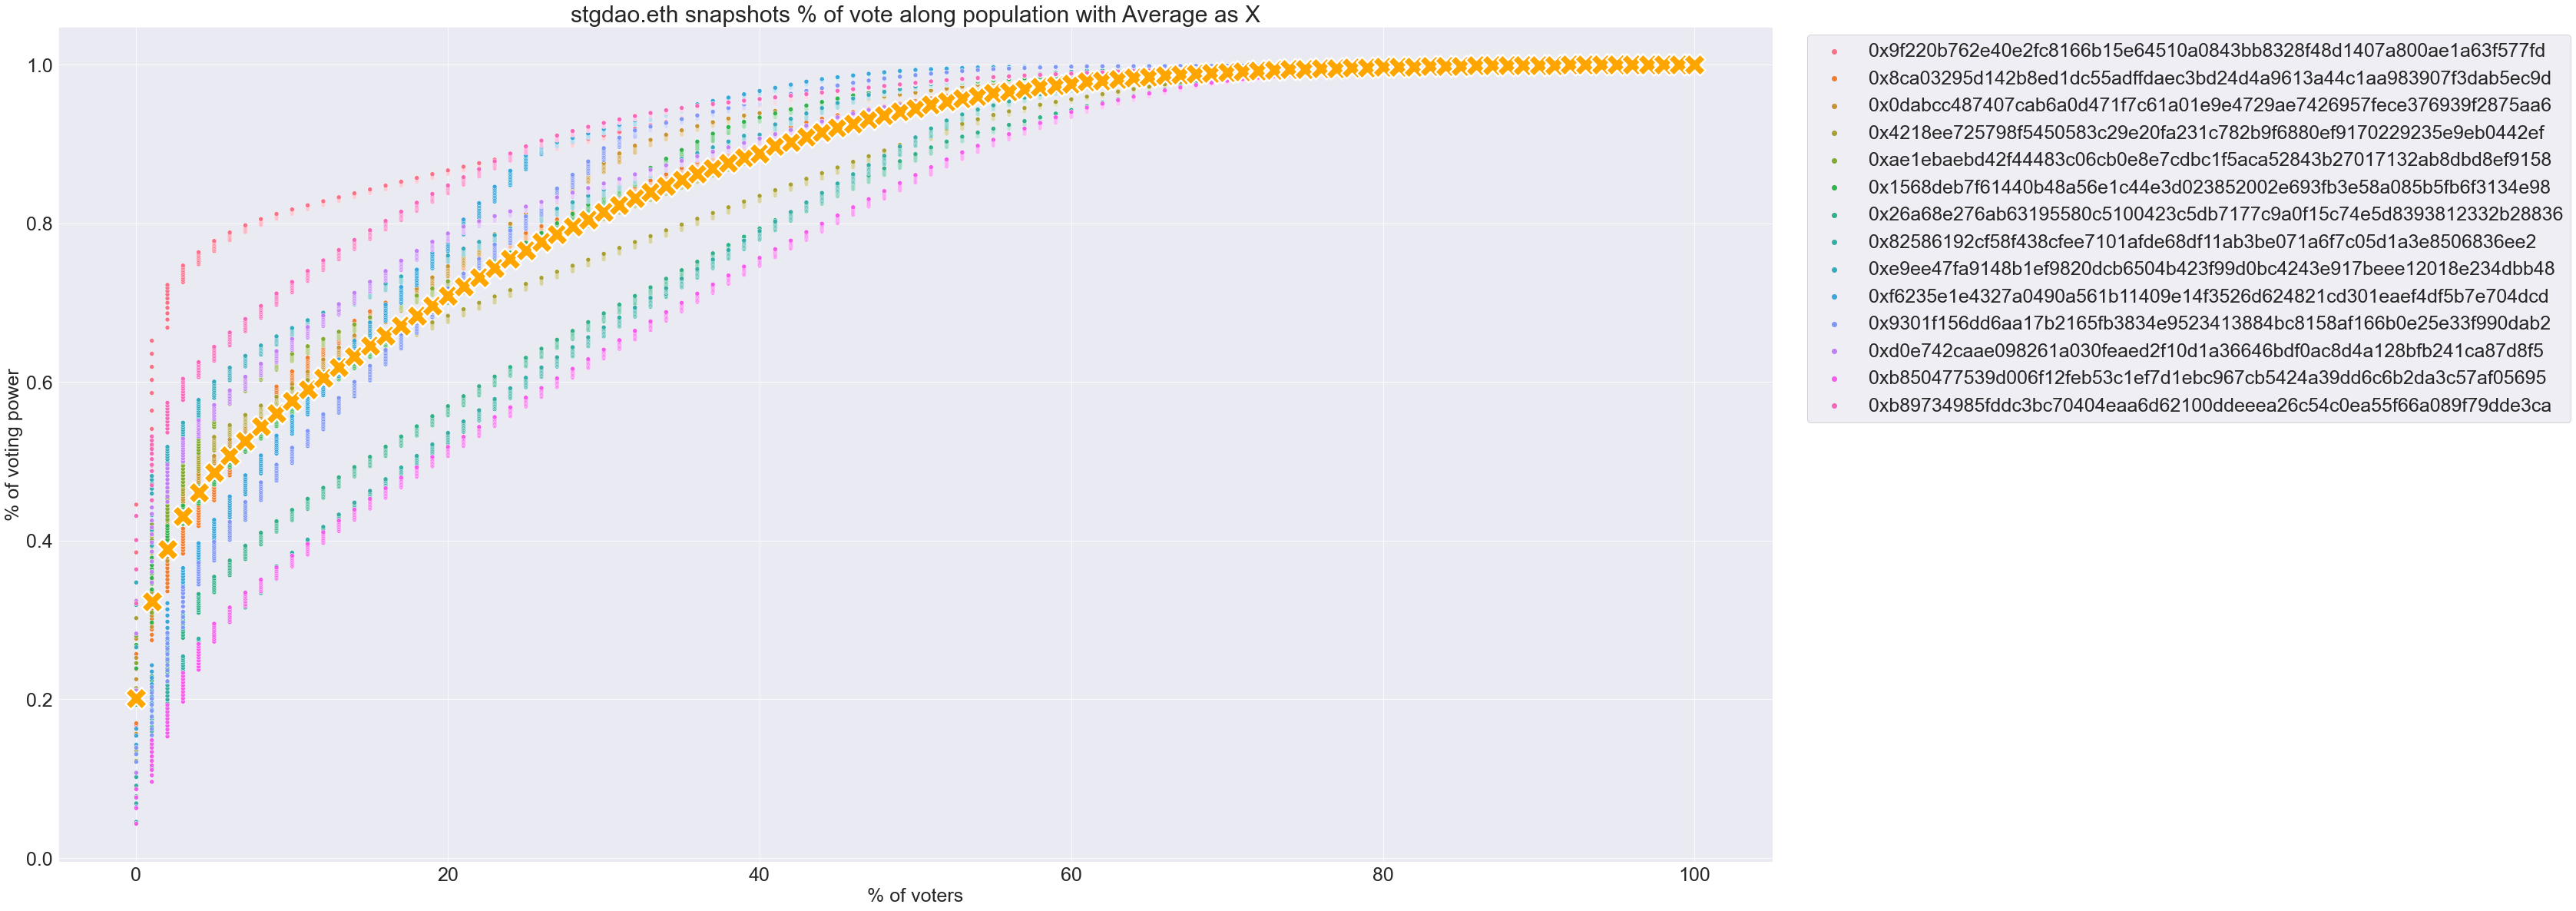

In [30]:
plt.rc("figure", figsize=(40, 20))
#sns.set_style("whitegrid")
plt.rc("font", size=25)
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()
##print(data_means)
plot_title = spacename + ' snapshots % of vote along population with Average as X'

ax=sns.scatterplot(data=crunch_data, hue = "proposals_id",y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped").set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')
chart = sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp",zorder=3, s=800,marker='X',color = 'orange')
#and save the chart file, too
#plt.legend([],[], frameon=False)
#place legend outside bottom right corner of plot
plt.legend(bbox_to_anchor=(1.02, 0.99), loc='upper left', borderaxespad=0)

print(chart)
plt.savefig(file+'\\'+spacename+' vote power distribution.png',transparent =False,  dpi=100)